In [1]:
from PIL import Image
from pathlib import Path
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
picture_path = Path(os.getcwd() + "/10x/GUNDA_ACC_T4_1_10x.png")
print(picture_path)
pic = Image.open(picture_path)

/Users/valerie/Documents/projects/vessel_analysis/10x/GUNDA_ACC_T4_1_10x.png


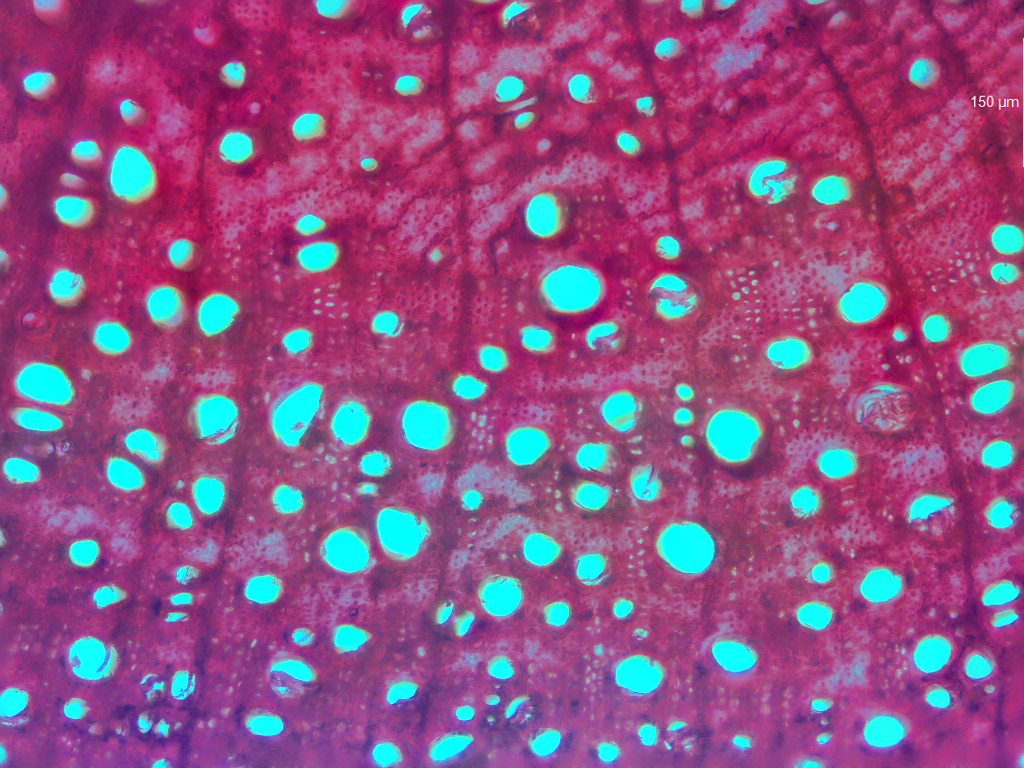

In [3]:
pic

In [4]:
# test_df = pd.read_csv('example.csv', names=['x','y'], index_col=None)
# test_df
# plt.scatter([5,],[464,],c='red',s=1)
# plt.scatter([17,],[384,],c='red',s=1)
# plt.scatter([19,],[415,],c='red',s=1)
# plt.scatter([24,],[81,],c='red',s=1)
# plt.scatter([51,],[283,],c='red',s=1)
# plt.scatter([56,],[203,],c='red',s=1)
# plt.scatter([test_df['x'],],[test_df['y'],],c='red',s=1)


In [5]:
width, height = pic.size
print(width, height)

1024 768


In [6]:
#270 degree rotation because Carl said so - may not need to happen
#as_array = np.rot90(np.array(pic.convert("L")),3)
as_array = np.array(pic)[...,2]
print(as_array)

[[113 109  99 ...  84  84  83]
 [100 108 108 ...  82  78  79]
 [100 105 103 ...  79  78  75]
 ...
 [181 184 182 ... 229 235 240]
 [177 177 172 ... 218 236 253]
 [179 176 166 ... 212 220 234]]


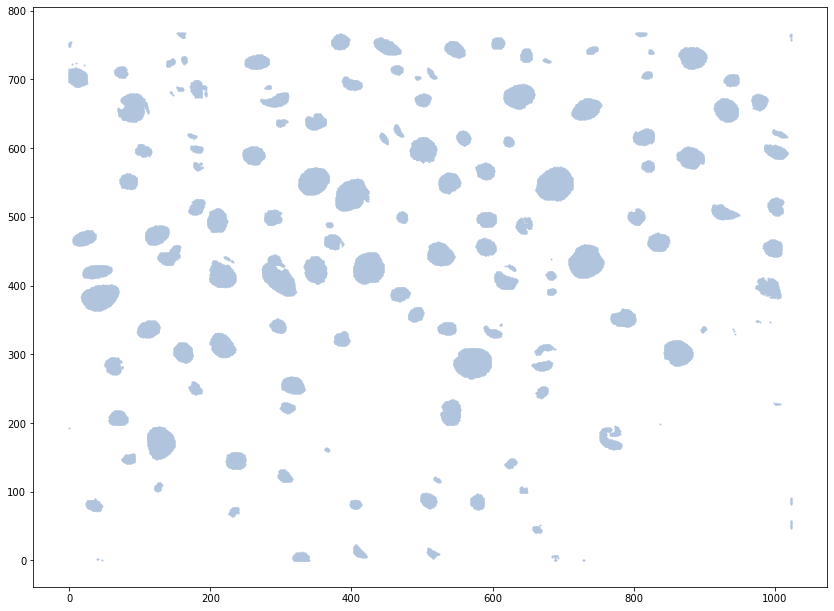

In [11]:
bright = np.argwhere(as_array>240)

px = 1/plt.rcParams['figure.dpi']
fig, ax = plt.subplots(figsize=(1024*px, 768*px))

plt.scatter(bright[...,1], bright[...,0], s=1, c='lightsteelblue')

plt.show()

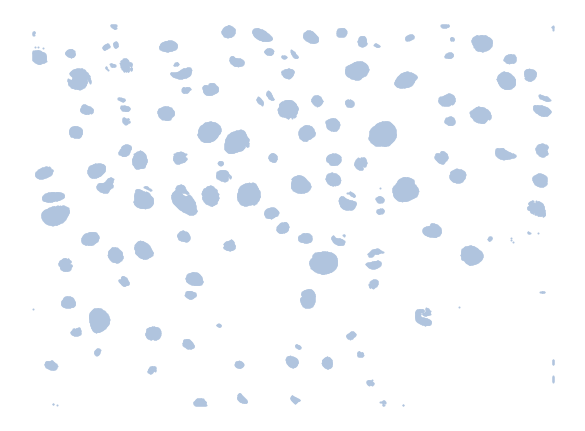

In [14]:
bright = np.argwhere(as_array > 240)

px = 1 / plt.rcParams['figure.dpi']
fig, ax = plt.subplots(figsize=(1024 * px, 768 * px))

plt.scatter(bright[..., 1], bright[..., 0], s=1, c='lightsteelblue')

# Adjust figure size
fig.set_size_inches(10.24, 7.68)

# Turn off axes
ax.axis('off')

# Save the figure
fig.savefig('output.png', dpi=100)

plt.show()

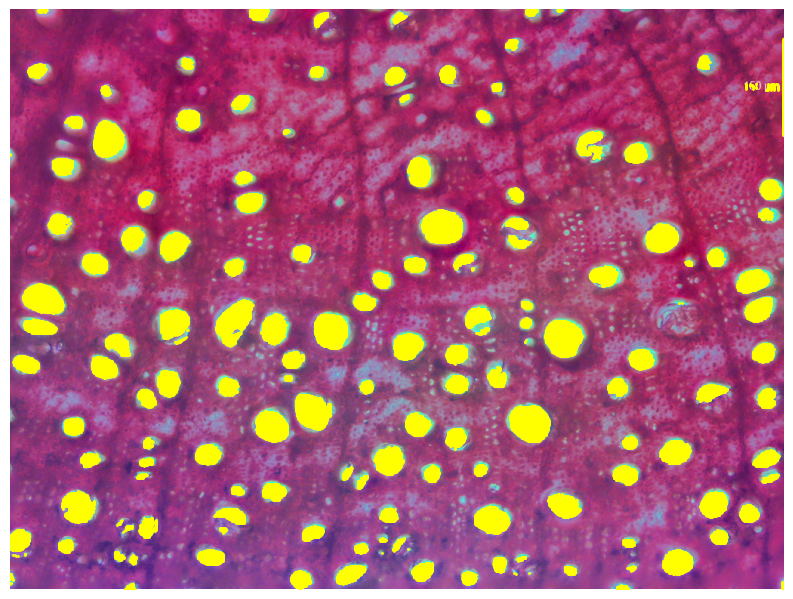

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'original_image' is your original image as a NumPy array
# 'as_array' is the processed image
original_image = plt.imread(picture_path) # Replace with your actual image path
bright = np.argwhere(as_array > 230)

# Image size
image_size = original_image.shape

# Calculate the figsize from the image size
figsize = image_size[1]/100, image_size[0]/100

# Create the figure and axes
fig, ax = plt.subplots(figsize=figsize, dpi=100)

# Display the image
ax.imshow(original_image)

# Overlay the scatter plot
ax.scatter(bright[..., 1], bright[..., 0], s=1, c='yellow')

# Turn off axes
ax.axis('off')

# Save the figure
plt.savefig('output3.png', dpi=100, bbox_inches='tight', pad_inches=0)

plt.show()


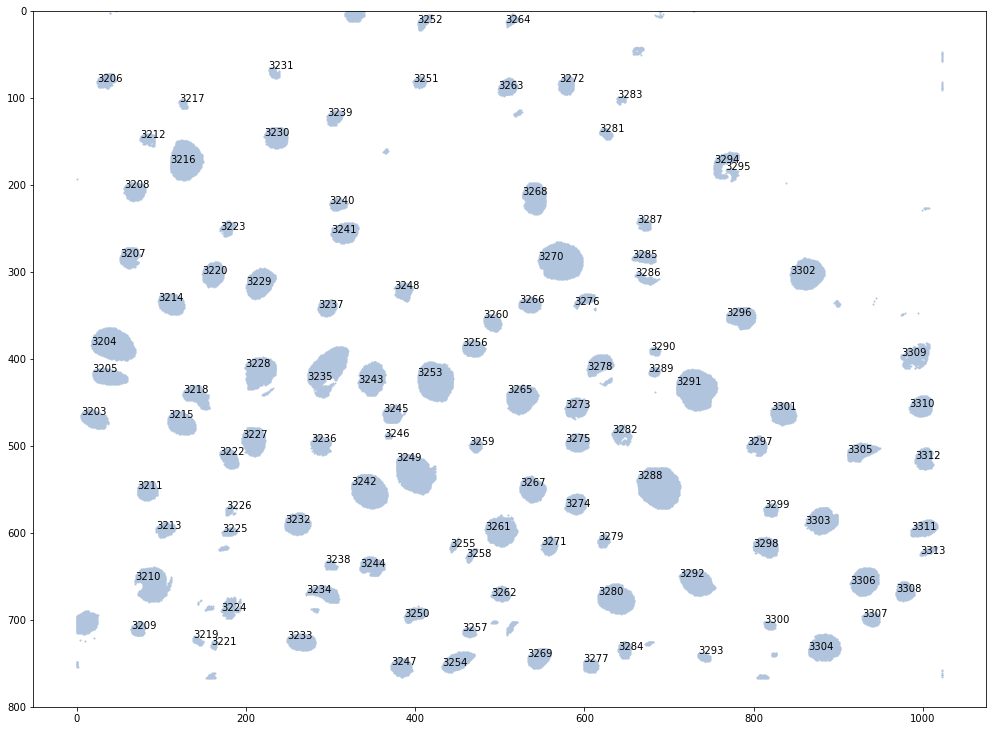

In [8]:
df = pd.read_csv('dataframe.csv', index_col=0)
bright = np.argwhere(as_array>240)
fig, ax = plt.subplots(figsize=(width/60.0, height/60.0))
plt.scatter(bright[...,1], bright[...,0], s=1, c='lightsteelblue')
plt.ylim(800,0)


for index, row in df[df['name']=='GUNDA_ACC_T4_1_10x'].iterrows():
    txt = index
    something = row['pixels'].replace("[", "").replace("]", "").replace("'", "").split('\n')[0].split(' ')
    xy_list = [int(x) for x in something if x.isnumeric()]
    plt.annotate(txt, xy=(xy_list[0], xy_list[1]))
    
plt.show()

3203 5 464
3204 17 384
3205 19 415
3206 24 81
3207 51 283
3208 56 203
3209 64 710
3210 69 654
3211 72 549
3212 75 146
3213 94 595
3214 96 333
3215 108 468
3216 111 174
3217 121 104
3218 126 439
3219 138 721
3220 148 302
3221 159 729
3222 169 510
3223 170 251
3224 171 690
3225 172 599
3226 177 572
3227 196 491
3228 199 409
3229 200 315
3230 222 144
3231 227 67
3232 246 589
3233 249 722
3234 271 669
3235 273 424
3236 277 495
3237 285 341
3238 294 635
3239 296 121
3240 299 222
3241 301 255
3242 325 545
3243 333 427
3244 335 639
3245 362 461
3246 364 489
3247 372 752
3248 375 319
3249 378 517
3250 387 697
3251 398 81
3252 403 13
3253 403 419
3254 432 753
3255 441 616
3256 456 385
3257 456 713
3258 460 628
3259 464 499
3260 481 353
3261 483 596
3262 490 672
3263 498 90
3264 507 13
3265 509 439
3266 523 336
3267 524 546
3268 527 211
3269 533 743
3270 545 286
3271 549 614
3272 570 81
3273 577 456
3274 577 570
3275 578 495
3276 588 338
3277 599 748
3278 603 412
3279 616 608
3280 616 671
3281 6

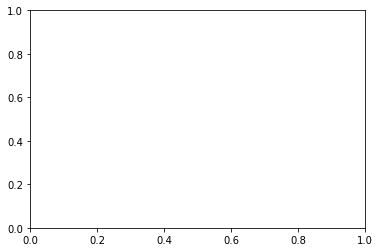

In [8]:
df = pd.read_csv('dataframe.csv', index_col=0)
count = 0
for index, row in df[df['name']=='GUNDA_ACC_T4_1_10x'].iterrows():
    if count < 1000:
        txt = index
        something = row['pixels'].replace("[", "").replace("]", "").replace("'", "").split('\n')[0].split(' ')
        xy_list = [x for x in something if x.isnumeric()]
        plt.annotate(txt, xy=(int(xy_list[0]), int(xy_list[1])), xytext=(0,0), textcoords='offset points', fontsize=6, ha='left', va='top')
        print(str(txt), xy_list[0], xy_list[1])
        count+=1

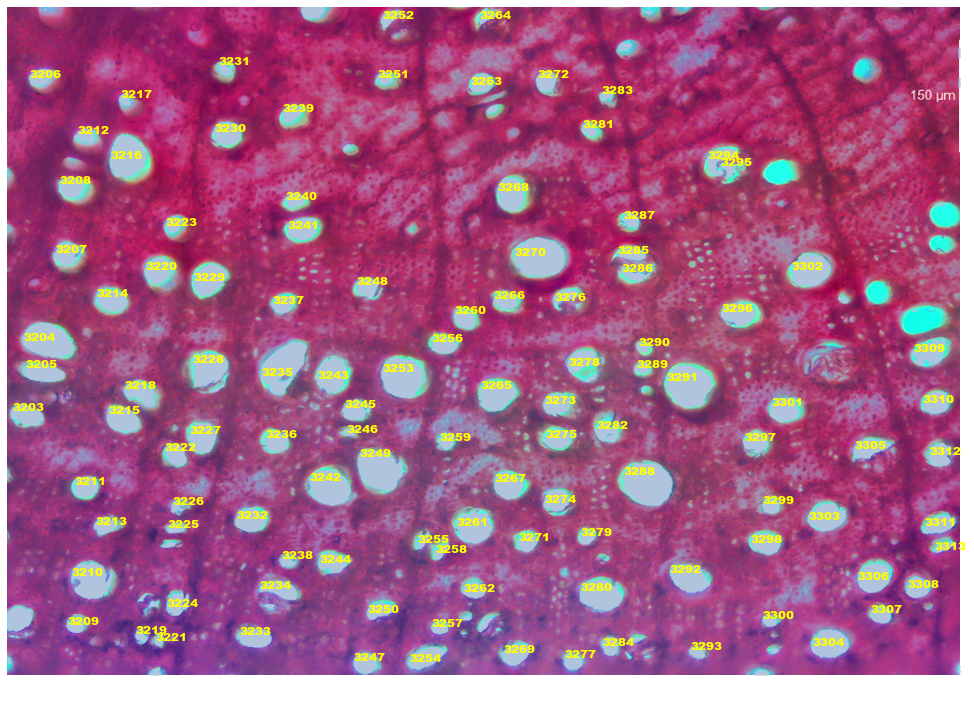

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'original_image' is your original image as a NumPy array
# 'as_array' is the processed image
original_image = plt.imread(picture_path) # Replace with your actual image path

# Convert pixel values to float so imshow can show the image
original_image = original_image.astype(float)

df = pd.read_csv('dataframe.csv', index_col=0)
bright = np.argwhere(as_array>240)

fig, ax = plt.subplots(figsize=(width/60.0, height/60.0))

# Show the original image
ax.imshow(original_image, aspect='auto')

# Create scatter plot
plt.scatter(bright[...,1], bright[...,0], s=1, c='lightsteelblue')
plt.ylim(800,0)

for index, row in df[df['name']=='GUNDA_ACC_T4_1_10x'].iterrows():
    txt = index
    something = row['pixels'].replace("[", "").replace("]", "").replace("'", "").split('\n')[0].split(' ')
    xy_list = [int(x) for x in something if x.isnumeric()]
    plt.annotate(txt, xy=(xy_list[0], xy_list[1]), color='yellow', fontsize=12, fontname='Arial Black')
    
# Turn off axes
ax.axis('off')

# Save the figure
plt.savefig('output.png', dpi=100, bbox_inches='tight', pad_inches=0)

plt.show()


In [9]:
plt.savefig('map4.png')

<Figure size 432x288 with 0 Axes>

Text(24, 81, '3206')

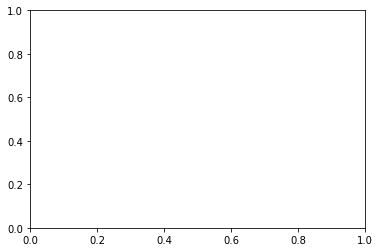

In [66]:
#%matplotlib notebook
#%matplotlib inline
plt.annotate(3203, xy=(5, 464))
plt.annotate(3204, xy=(17, 384))
plt.annotate(3205, xy=(19, 415))
plt.annotate(3206, xy=(24, 81))


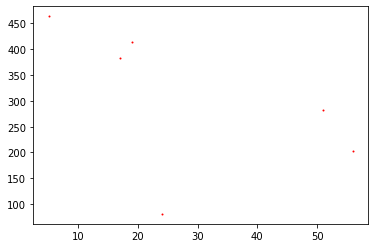

In [11]:
plt.scatter([5,],[464,],c='red',s=1)
plt.scatter([17,],[384,],c='red',s=1)
plt.scatter([19,],[415,],c='red',s=1)
plt.scatter([24,],[81,],c='red',s=1)
plt.scatter([51,],[283,],c='red',s=1)
plt.scatter([56,],[203,],c='red',s=1)

In [11]:
# in the most recent growth ring (biggest/most clustered holes): 
# area of each vessel, maximum and minimum diameter of each, 
# difference between the max and min diameter (circularity), 
# area of the tissue (not vessels),
# if the vessels are whole or part (eg. cut in half)

# export the blobs as polygons to overlay on top of og image
# would this work with different dye/microscope - should be ok as long as holes are bright

['', '', '5', '464']
['5', '464']


ConversionError: Failed to convert value(s) to axis units: '5'

<Figure size 432x288 with 1 Axes>

In [124]:
import math
# def calculate_smoothness(perimeter, area):
#     compactness = (perimeter ** 2) / area
#     smoothness = 1 / compactness
#     return smoothness
def calculate_smoothness(row):
    perimeter = row['perimeter']
    area = row['area']
    compactness = (perimeter ** 2) / area
    smoothness = 1 / compactness
    return smoothness

df['rainfall'] = np.where(df['name'].str.contains('STURT'), 'low',
                          np.where(df['name'].str.contains('GUNDA'), 'high',
                                   np.where(df['name'].str.contains('NOCCO'), 'mod', '')))
df['rainfall_num'] = df['rainfall'].map({'low': 30, 'mod': 20, 'high': 10})

df['smoothness'] = df.apply(calculate_smoothness, axis=1)



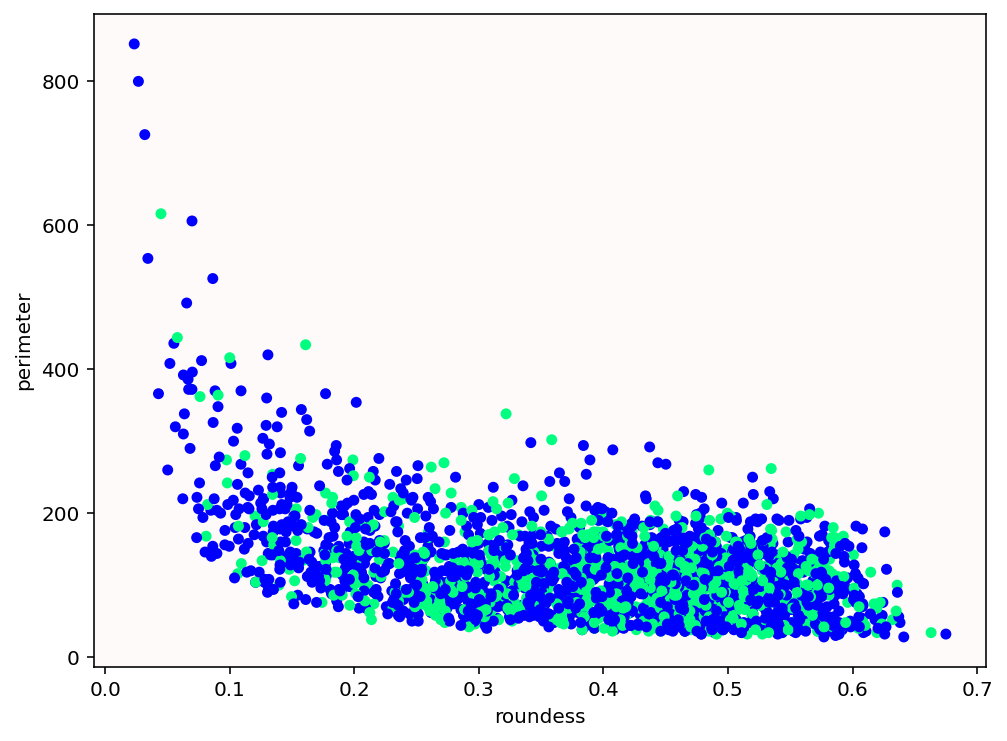

In [121]:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')


# Scatter plot with different colors for rainfall categories
plt.scatter(df['roundess'], df['perimeter'], c=df['rainfall_num'], cmap='winter', s=20)
plt.xlabel('roundess')
plt.ylabel('perimeter')
ax = plt.gca()
ax.set_facecolor('snow')

plt.show()

In [114]:
df

name                                             pixels  \
0     STURT_ACC_T14_1_10x  [[ 17 310]\n [ 18 310]\n [ 17 311]\n ...\n [ 5...   
1     STURT_ACC_T14_1_10x  [[ 52 465]\n [ 53 465]\n [ 52 466]\n [ 52 465]...   
2     STURT_ACC_T14_1_10x  [[ 68 343]\n [ 69 343]\n [ 68 344]\n [ 68 343]...   
3     STURT_ACC_T14_1_10x  [[ 84 609]\n [ 85 609]\n [ 84 610]\n [ 84 609]...   
4     STURT_ACC_T14_1_10x  [[ 98  53]\n [ 99  53]\n [ 98  54]\n [ 98  53]...   
...                   ...                                                ...   
3845  NOCO_SHED_T17_3_10x  [[904 488]\n [904 489]\n [904 488]\n ...\n [93...   
3846  NOCO_SHED_T17_3_10x  [[928 685]\n [929 685]\n [928 685]\n ...\n [96...   
3847  NOCO_SHED_T17_3_10x  [[938 595]\n [939 595]\n [938 596]\n [938 595]...   
3848  NOCO_SHED_T17_3_10x  [[942 730]\n [943 730]\n [942 731]\n ...\n [97...   
3849  NOCO_SHED_T17_3_10x  [[970 524]\n [971 524]\n [970 525]\n ...\n [99...   

      area                                               edge  perimeter  \
0     1546  [[ 17 310]\n [ 18 310]\n [ 17 310]\n [ 18 309]...        192   
1      412  [[ 52 465]\n [ 53 465]\n [ 52 465]\n [ 53 464]...         98   
2      356  [[ 68 343]\n [ 69 343]\n [ 68 344]\n [ 68 343]...        104   
3      179  [[ 84 609]\n [ 84 610]\n [ 84 609]\n [ 86 608]...         68   
4      291  [[ 98  53]\n [ 99  53]\n [ 98  53]\n [ 99  52]...        134   
...    ...                                                ...        ...   
3845   833  [[904 488]\n [904 488]\n [905 489]\n [904 490]...        152   
3846   740  [[928 685]\n [929 685]\n [928 685]\n [929 684]...        148   
3847   438  [[938 595]\n [939 595]\n [938 595]\n [939 594]...        104   
3848   649  [[942 730]\n [942 730]\n [942 732]\n [944 729]...        130   
3849   807  [[ 970  524]\n [ 970  524]\n [ 972  524]\n [ 9...        142   

      length  width  roundess rainfall  rainfall_num  
0         24     20  0.527008      low          10.0  
1         15      8  0.539082      low          10.0  
2         14      7  0.413612      low          10.0  
3         10      6  0.486458      low          10.0  
4         14      6  0.203654      low          10.0  
...      ...    ...       ...      ...           ...  
3845      20     12  0.453072                    NaN  
3846      19     12  0.424540                    NaN  
3847      15      9  0.508882                    NaN  
3848      18     12  0.482578                    NaN  
3849      18     13  0.502929                    NaN  

[3850 rows x 10 columns]

/var/folders/gy/19bbmxds2rl7359m9k4yt6fw0000gn/T/ipykernel_1949/250426013.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(mean_corr, dtype=np.bool)


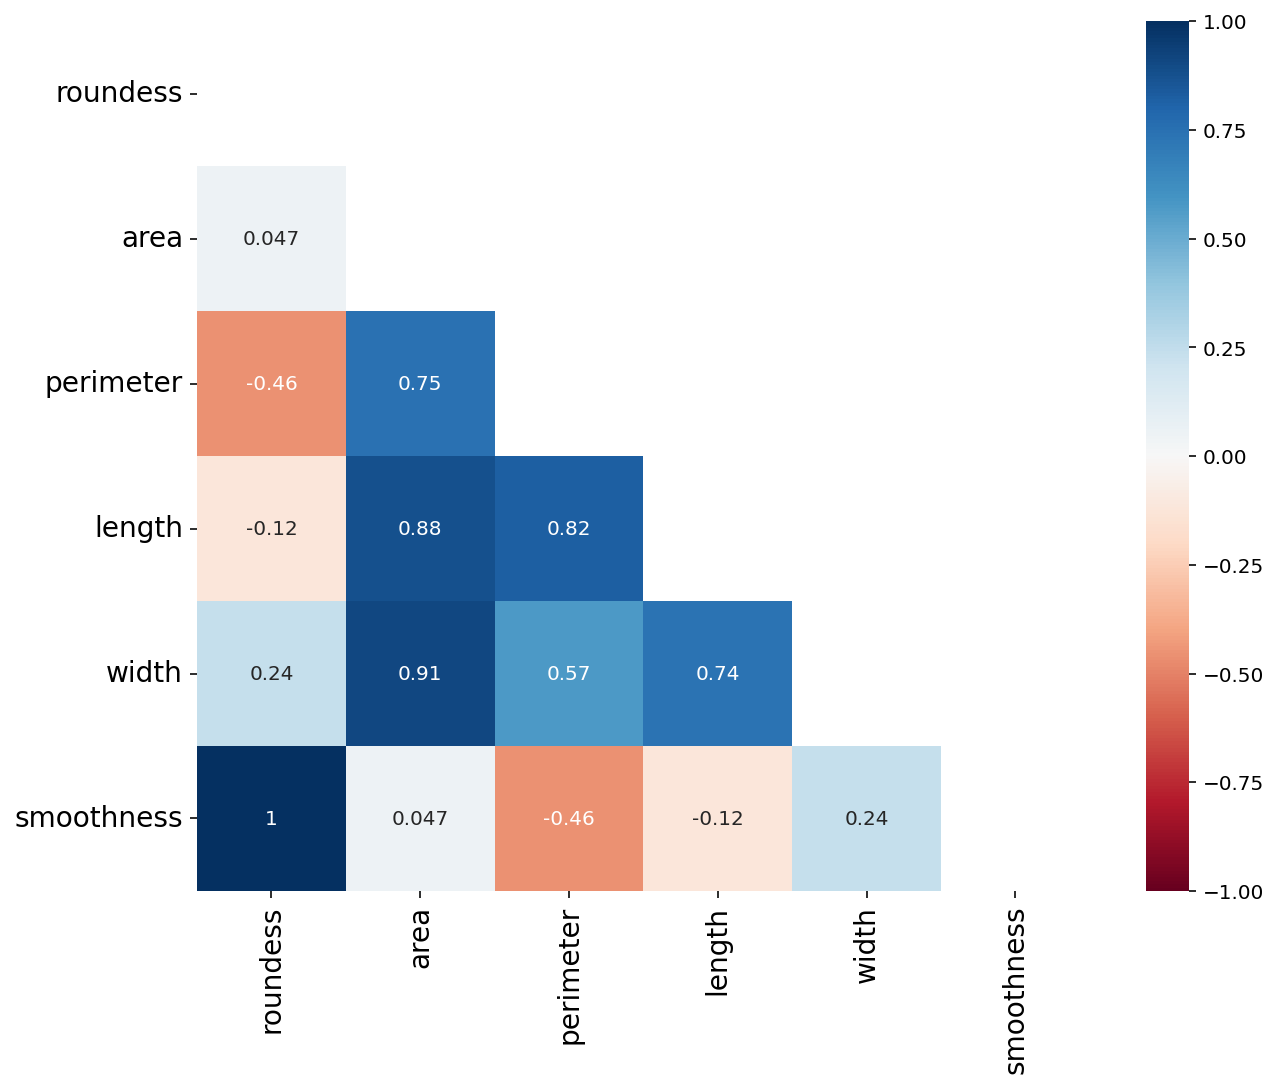

In [125]:
## HEATMAP ##
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# change df to your DataFrame name. if needed, drop columns here.
mean_corr = df[['roundess', 'area', 'perimeter', 'length', 'width', 'smoothness']].corr()
# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(10,8))
# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)
# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [14]:
# blob_id = 0

# blobs = {}
# pixel_has_been_considered = [[0,0]]
# for seed in bright:

#     if ((seed == pixel_has_been_considered).all(1)).any():
#         continue

#     print(blob_id)        
#     pixels_to_consider = [seed,]

#     pixels_in_blob = [seed,]

#     while pixels_to_consider:
#         new_pixels_to_consider = [] 
#         for ptc in pixels_to_consider:
            
#             # This assumes that blobs must be in pixels that touch each other
#             # if you want to allow for for (for example) 2 white spaces that
#             # another part of the blob you could include things like (0,-3), 
#             # (0, 3), etc.
#             for change in [(-1,0), (0,-1), (1,0), (0,1)]:

#                 # the pixel we are looking at has already been examined
#                 if ((ptc+change == pixel_has_been_considered).all(1)).any():
#                     continue

#                 # if the pixel we ar elooking at is a bright spot
#                 if ((ptc+change == bright).all(1)).any():
#                     pixels_in_blob.append(ptc+change)
#                     new_pixels_to_consider.append(ptc+change) # this will be included in the next loop

#                 pixel_has_been_considered.append(ptc+change)
#         pixels_to_consider = new_pixels_to_consider.copy()

    
#     blobs[blob_id] = pixels_in_blob
#     blob_id += 1



In [12]:
def get_length_and_width(pixels):
    # Now let's get length and width
    centre_x,centre_y= np.mean(pixels,0)

    line_length=200

    angels = []

    for radians in np.arange(0,np.pi,np.pi/180):
        line_y_start = centre_y + line_length*np.sin(radians)
        line_y_end = centre_y - line_length*np.sin(radians)
        line_x_start = centre_x + line_length*np.cos(radians)
        line_x_end = centre_x - line_length*np.cos(radians)

        line_x = np.linspace(line_x_start,line_x_end,200)
        line_y = np.linspace(line_y_start,line_y_end,200)

        # the image is stored as integers, so the line should be converted to ints
        line = np.concatenate([line_x[np.newaxis,:],line_y[np.newaxis,:]]).T.astype(int)

        angels.append(np.sum([(l==pixels).all(1).any() for l in line]))

    angels = np.array(angels)

    ####
    # Length = Max
    # Width = 90 degree offset of length
    ####
    #
    # length_locations = np.argwhere(angels==np.max(angels))
    # width_locations = np.where(length_locations>90,length_locations-90,length_locations+90)
    #
    # length = np.mean(angels[length_locations])
    # width = np.mean(angels[width_locations])

    
    ####
    # Length = Max
    # Width = Min
    #####
    length = np.max(angels)
    width = np.min(angels)

    return length,width

In [16]:
blob_id = 0

too_big = 4000

blobs = {}

folder_path = '10x'


count = 0

for file_idx, file in enumerate(Path(folder_path).glob('*.png')):
    while count < 1:
        count+=1
        pic = Image.open(file)
        print(file.name)
        print(pic)
        # the transposition makes the first axis the x value  So now things are stored in (x,y) pairs
        as_array = np.array(pic)[...,2].T
        image_dims = as_array.shape

        bright = np.argwhere(as_array>240)

        pixel_has_been_considered = [[0,0]]

        for idx, seed in enumerate(bright):

            if ((seed == pixel_has_been_considered).all(1)).any():
                continue

            pixels_to_consider = [seed,]

            pixels_in_blob = [seed,]

            while pixels_to_consider:
                if len(pixels_in_blob) > too_big:
                    break
                new_pixels_to_consider = [] 
                for ptc in pixels_to_consider:

                    # This assumes that blobs must be in pixels that touch each other
                    # if you want to allow for for (for example) 2 white spaces that
                    # another part of the blob you could include things like (0,-3), 
                    # (0, 3), etc.
                    #
                    # if you go further than 1 step you should prob include 45 degree
                    # steps like (-1,-1), and (2,2).  As you go further out you should 
                    # include other weird angles like 30 and 60 degrees
                    for change in [(-1,0), (0,-1), (1,0), (0,1)]:

                        # the pixel we are looking at has already been examined
                        if ((ptc+change == pixel_has_been_considered).all(1)).any():
                            continue

                        # if the pixel we ar elooking at is a bright spot
                        if ((ptc+change == bright).all(1)).any():
                            pixels_in_blob.append(list(ptc+change))
                            new_pixels_to_consider.append(ptc+change) # this will be included in the next loop

                        pixel_has_been_considered.append(ptc+change)
                pixels_to_consider = new_pixels_to_consider.copy()

            pixels = np.array(pixels_in_blob)

            if len(pixels_in_blob) > too_big:
                continue

            # exclude circles on the edges.  These are likely to be cut off bits, but either way they will mess
            # with roundess calcs
            if 0 in pixels or (image_dims[0]-1) in pixels[...,0] or (image_dims[1]-1) in pixels[...,1]:
                continue

            length,width = get_length_and_width(pixels)

            # Throw away bad ones
            if width <= 2 or length <= 2:# or blobs[blob_id]['area'] < 10:
                continue

            blobs[blob_id] = {}
            blobs[blob_id]['name'] = file.stem
            blobs[blob_id]['pixels'] = pixels
            blobs[blob_id]['area'] = len(pixels)

            ####
            # edge detection
            ###
            change = [[-1,0], [0,-1], [1,0], [0,1]]
            edge = []
            perimeter = 0
            for p_test in pixels:
                number_of_neighbours = np.sum([np.sum(((p_test+change)==p).all(1)) for p in pixels])
                if number_of_neighbours != 4:
                    edge.append(p_test)    
                    # assume every pixel is a unit square.  The contribution to the overall perimeter is:
                    # 0 if a pixel has 4 neighbours
                    # 1 if it has 3 (i.e. it is on a verticle piece of the hole)
                    # 2 if it has 2 (i.e. its a corner)
                    # 3 if it has 1 (i.e. it is a vertex)

                    perimeter += (4-number_of_neighbours)  

            blobs[blob_id]['edge'] = np.array(edge)
            blobs[blob_id]['perimeter'] = perimeter

            blobs[blob_id]['length'] = length
            blobs[blob_id]['width'] = width

            # 1 = perfect circle, 0 = rubbish
            # 4πA/P^2 from measure of leaf circularity https://www.tandfonline.com/doi/full/10.1080/15592324.2021.1977530
            blobs[blob_id]['roundess'] = (4*np.pi) * len(pixels) / (perimeter)**2
            blob_id += 1

            if (blob_id+1) % 10 == 0:
                print(f"File Idx {file_idx+1} | Point {idx+1} of {len(bright)} | Blobs: {blob_id+1}")

            
        print("count: "+str(count))
        print(blobs)

STURT_ACC_T14_1_10x.png
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x768 at 0x7F88595C5DC0>
File Idx 1 | Point 9519 of 77815 | Blobs: 10
File Idx 1 | Point 17278 of 77815 | Blobs: 20
File Idx 1 | Point 24137 of 77815 | Blobs: 30
File Idx 1 | Point 32214 of 77815 | Blobs: 40
File Idx 1 | Point 46585 of 77815 | Blobs: 50
File Idx 1 | Point 65023 of 77815 | Blobs: 60
count: 1
{0: {'name': 'STURT_ACC_T14_1_10x', 'pixels': array([[ 17, 310],
       [ 18, 310],
       [ 17, 311],
       ...,
       [ 52, 334],
       [ 51, 335],
       [ 50, 336]]), 'area': 1546, 'edge': array([[ 17, 310],
       [ 18, 310],
       [ 17, 310],
       [ 18, 309],
       [ 17, 312],
       [ 18, 308],
       [ 17, 313],
       [ 18, 307],
       [ 17, 314],
       [ 17, 315],
       [ 19, 306],
       [ 17, 316],
       [ 19, 305],
       [ 17, 317],
       [ 20, 304],
       [ 18, 318],
       [ 18, 319],
       [ 21, 303],
       [ 18, 320],
       [ 22, 302],
       [ 19, 321],
       [ 22, 30

In [18]:
import csv

In [20]:
print(pixels_in_blob)

[array([1017,  736]), [1017, 737], [1017, 736], [1017, 738], [1017, 739], [1017, 740], [1017, 741], [1017, 742], [1017, 743], [1017, 744], [1017, 745], [1017, 746], [1017, 747], [1017, 748], [1017, 749], [1017, 750], [1017, 751], [1017, 752], [1017, 753], [1017, 754], [1017, 755], [1017, 756], [1017, 757], [1017, 758]]


In [21]:
with open('blobs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(blobs.keys())
    writer.writerows(zip(*blobs.values()))

TypeError: 'int' object is not iterable

In [22]:
with open('my_dict.txt', 'w') as file:
    file.write(str(blobs))